In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
# 使用GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
! nvidia-smi

Tue Aug  2 16:54:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 73%   83C    P2   168W / 260W |   5747MiB / 11019MiB |     86%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 32%   

# MongoDB

In [4]:
from pymongo import MongoClient
import pymongo

In [5]:
mongoURI = "mongodb://%s:%s@%s/%s?authMechanism=SCRAM-SHA-1" % ("eva", "eva_30241", "140.117.69.70:30241", "eva")

try:
    conn = pymongo.MongoClient(mongoURI)
    db = conn.eva
    # db_rm_us = db.rm_patent_us
    # db_rm_cn = db.rm_patent_cn
    # db_rm_de = db.rm_patent_de
    
    # db_rm_us_2016 = db.rm_patent_us_2016
    db_rm_cn_2016 = db.rm_patent_cn_2016
    # db_rm_de_2016 = db.rm_patent_de_2016
except errors.ConnectionFailure as err:
    print(err)

# 2016

## Company數量

In [6]:
data_assignee = db_rm_cn_2016.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_cn = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [7]:
# 取總數前15家公司
# final_df.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
df_family_cn.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(16)

,company,count
28,ZTE Corp,117
10,Huawei Technologies Co Ltd,111
0,Anhui Sharetronic Iot Technology Co Ltd,85
26,Xian Irain IoT Technology Service Co Ltd,84
20,Shanghai Langbo Communication Technology Co Ltd,82
14,Nanjing IoT Sensor Technology Co Ltd,54
17,SUZHOU XUANHE IOT TECHNOLOGY Co Ltd,53
13,Jiangsu IoT Research and Development Center,48
6,China Mobile Communications Group Co Ltd,38
18,Samsung Electronics Co Ltd,37


In [8]:
# com_df = final_df.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_df = df_family_cn.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_df.reset_index(drop=True, inplace=True)

In [9]:
com_df["count_log"] = com_df["count"].apply(lambda x: np.log(x))
com_df

,company,count,count_log
0,ZTE Corp,117,4.762174
1,Huawei Technologies Co Ltd,111,4.709530
2,Anhui Sharetronic Iot Technology Co Ltd,85,4.442651
3,Xian Irain IoT Technology Service Co Ltd,84,4.430817
4,Shanghai Langbo Communication Technology Co Ltd,82,4.406719
5,Nanjing IoT Sensor Technology Co Ltd,54,3.988984
6,SUZHOU XUANHE IOT TECHNOLOGY Co Ltd,53,3.970292
7,Jiangsu IoT Research and Development Center,48,3.871201
8,China Mobile Communications Group Co Ltd,38,3.637586
9,Samsung Electronics Co Ltd,37,3.610918


In [10]:
com_ls = list(com_df.company)

## Data

In [11]:
ccontry = pd.read_csv("../patent/code/依年分/rm_company_country_cn_2016.csv")
ccpc = pd.read_csv("../LDA/company_lda_brief_cn_2016.csv")

In [12]:
ccontry[ccontry.company.isin(com_ls)]

,company,AR,AU,BR,CA,CL,CN,CO,DE,DK,...,PL,PT,RS,RU,SG,SI,TW,US,UY,ZA
17,Anhui Sharetronic Iot Technology Co Ltd,0.0,0.0,0.0,0.0,0.0,85.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,Chengdu Qinchuan IoT Technology Co Ltd,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
125,China Mobile Communications Group Co Ltd,0.0,0.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
344,Huawei Technologies Co Ltd,0.0,2.0,14.0,1.0,0.0,113.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,2.0
394,Jiangsu IoT Research and Development Center,0.0,0.0,0.0,0.0,0.0,76.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
471,Nanjing IoT Sensor Technology Co Ltd,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564,SHENZHEN QIANHAI LINGJU INTERNET OF THINGS SCI...,0.0,4.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,0.0
576,SUZHOU XUANHE IOT TECHNOLOGY Co Ltd,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
579,Samsung Electronics Co Ltd,0.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0
630,Shanghai Langbo Communication Technology Co Ltd,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0


## Similarity計算

### Country

- 換成機率  

In [13]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

### PBC
- 和Samsung Electronics Co Ltd比較

In [14]:
ccontry_pbc = ccontry2.loc[com_ls,:].copy()
ccontry_pbc.head()

,AR,AU,BR,CA,CL,CN,CO,DE,DK,EA,...,PL,PT,RS,RU,SG,SI,TW,US,UY,ZA
company,,,,,,,,,,,,,,,,,,,,,
ZTE Corp,0.0,0.000000,0.000000,0.000000,0.0,0.605263,0.0,0.0,0.0,0.0,...,0.0,0.005263,0.0,0.0,0.0,0.0,0.0,0.131579,0.0,0.000000
Huawei Technologies Co Ltd,0.0,0.007246,0.050725,0.003623,0.0,0.409420,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.202899,0.0,0.007246
Anhui Sharetronic Iot Technology Co Ltd,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
Xian Irain IoT Technology Service Co Ltd,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
Shanghai Langbo Communication Technology Co Ltd,0.0,0.000000,0.000000,0.000000,0.0,0.788462,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.173077,0.0,0.000000


In [15]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### CPC

In [16]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [17]:
ccpc_pbc = ccpc2.loc[com_ls,:].copy()
# ccpc_pbc

In [18]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

## Scatter Plot

In [19]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="Samsung Electronics Co Ltd"].values-com_df.count_log[com_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="Samsung Electronics Co Ltd"].values-com_df.count_log[com_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

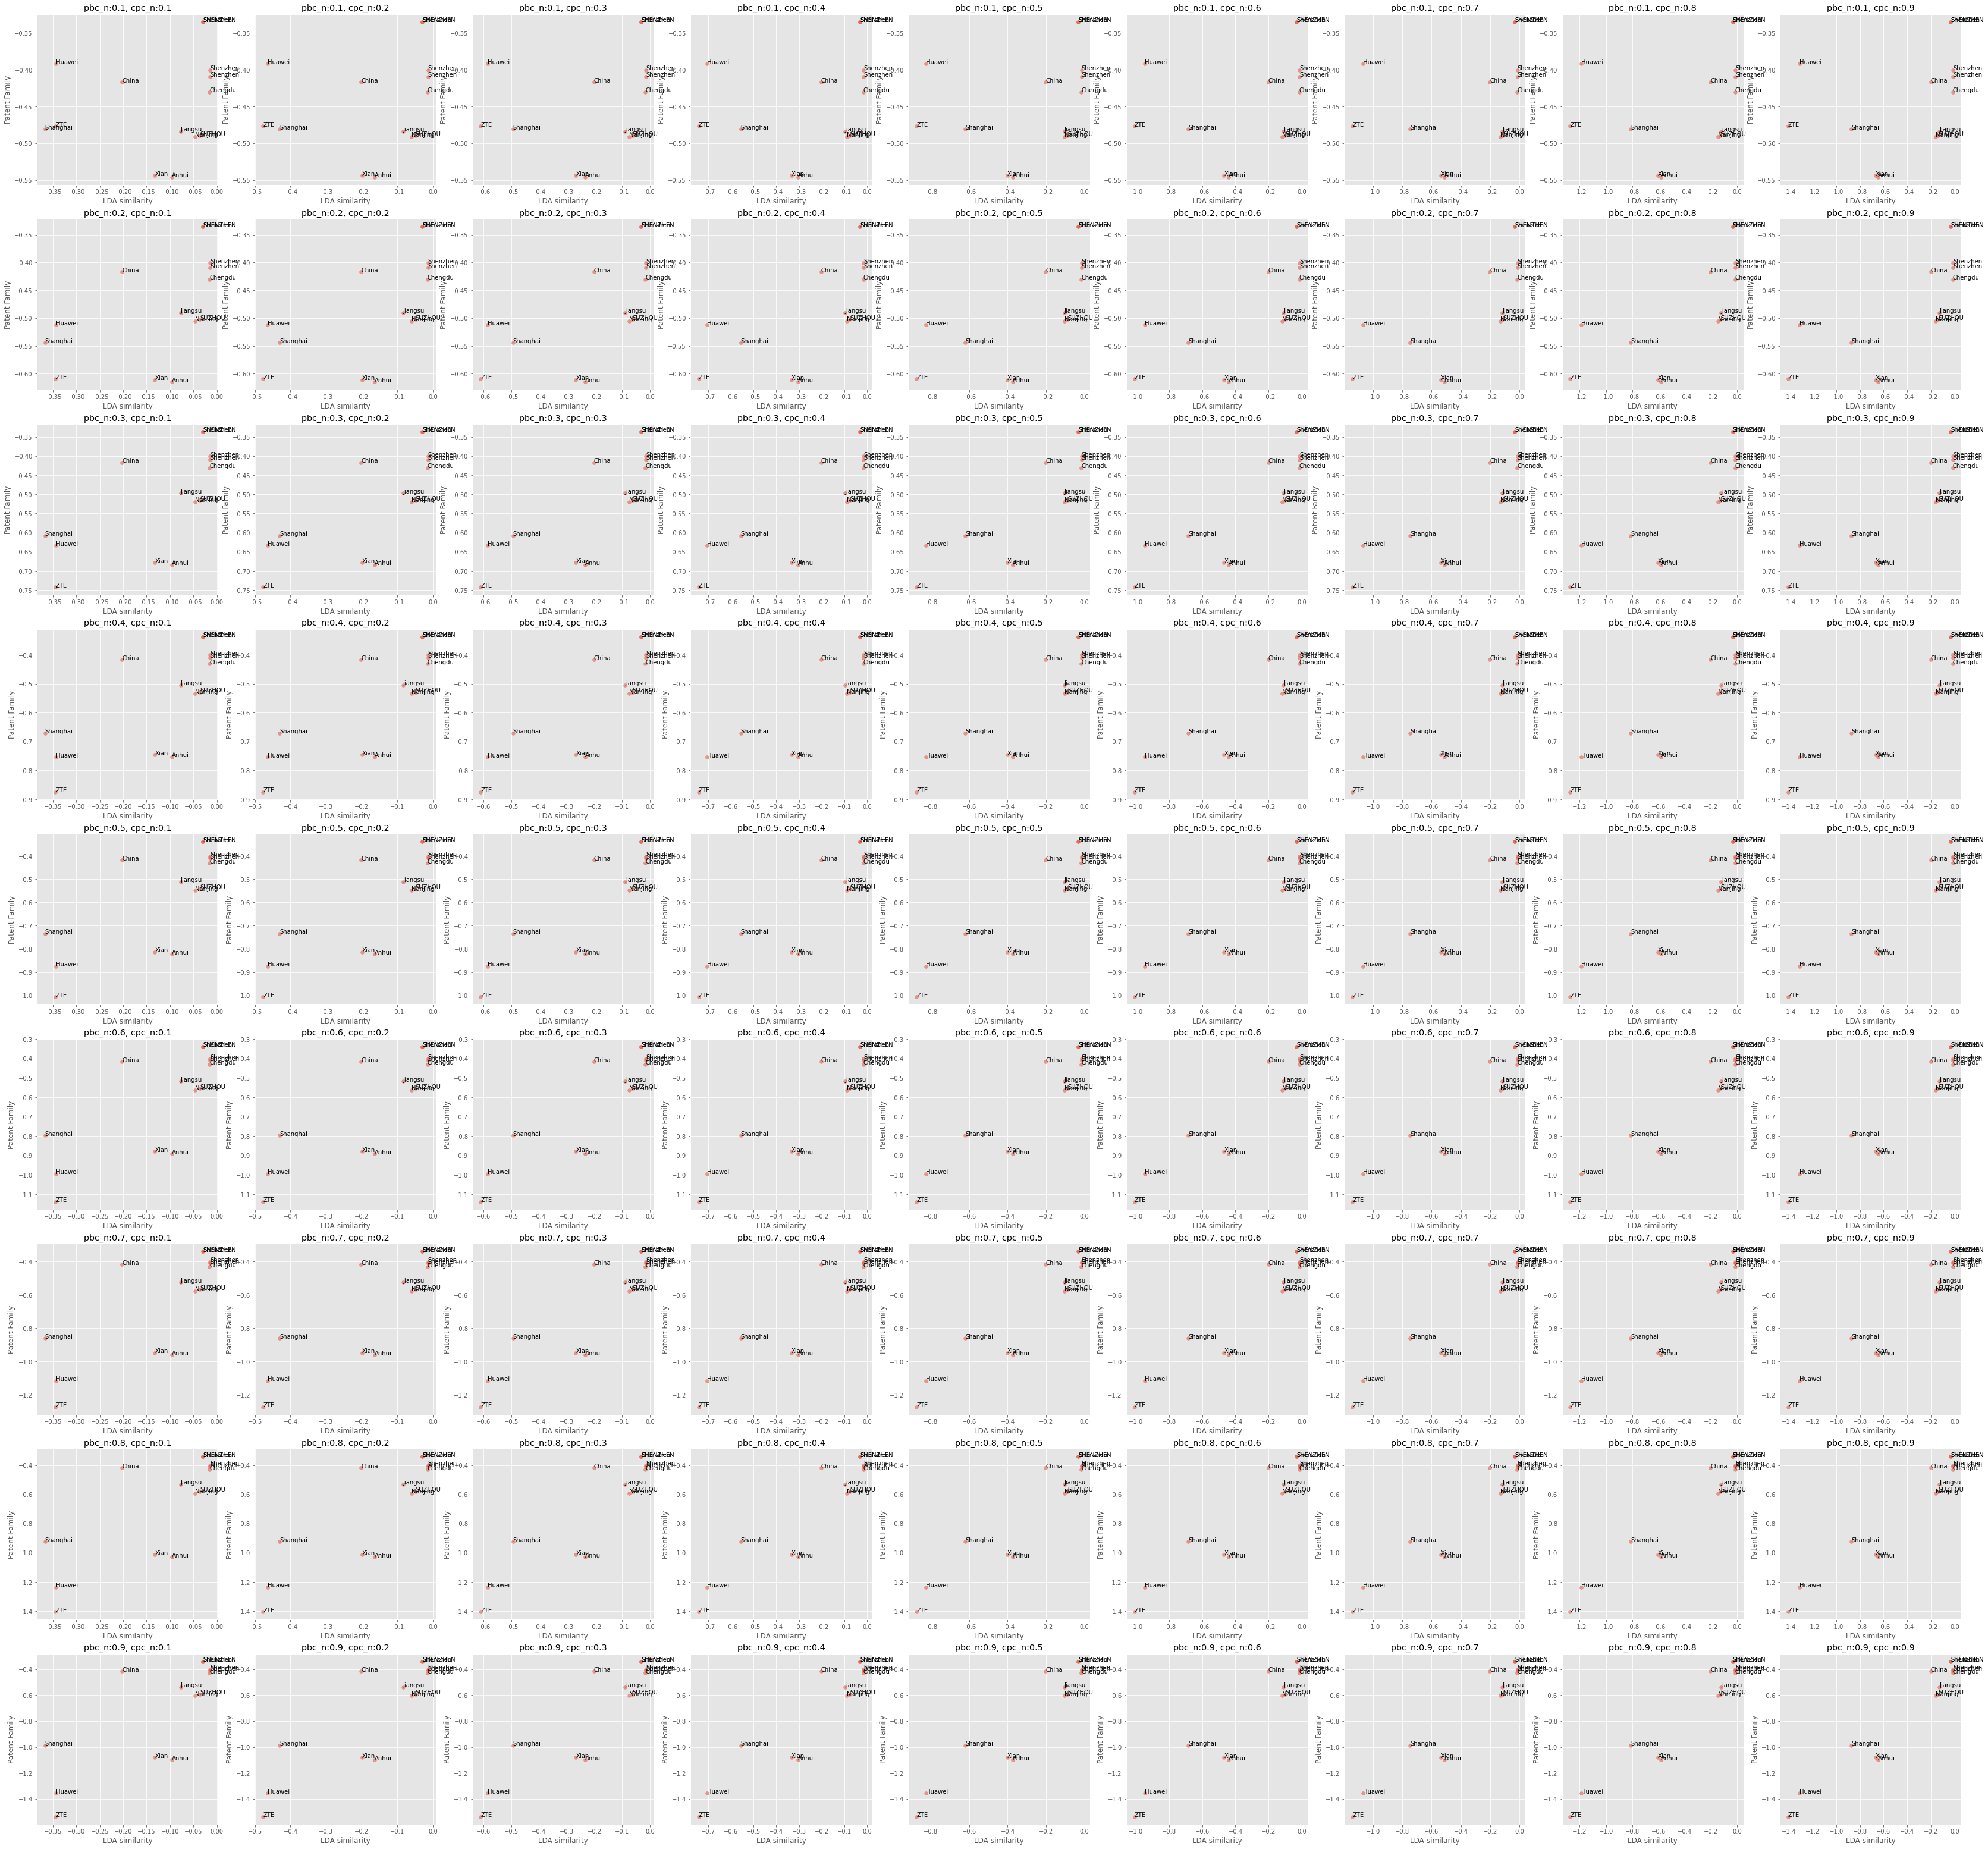

In [20]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("LDA similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_cn_brief_2016_1.png'.format(pbc_n))

In [21]:
c_df

,cpc,country
company,,
ZTE Corp,1.405141,1.537187
Huawei Technologies Co Ltd,1.309044,1.357321
Anhui Sharetronic Iot Technology Co Ltd,0.648993,1.099424
Xian Irain IoT Technology Service Co Ltd,0.670004,1.081832
Shanghai Langbo Communication Technology Co Ltd,0.873529,0.987698
Nanjing IoT Sensor Technology Co Ltd,0.160673,0.605462
SUZHOU XUANHE IOT TECHNOLOGY Co Ltd,0.139692,0.593056
Jiangsu IoT Research and Development Center,0.131355,0.537794
China Mobile Communications Group Co Ltd,0.202632,0.417497


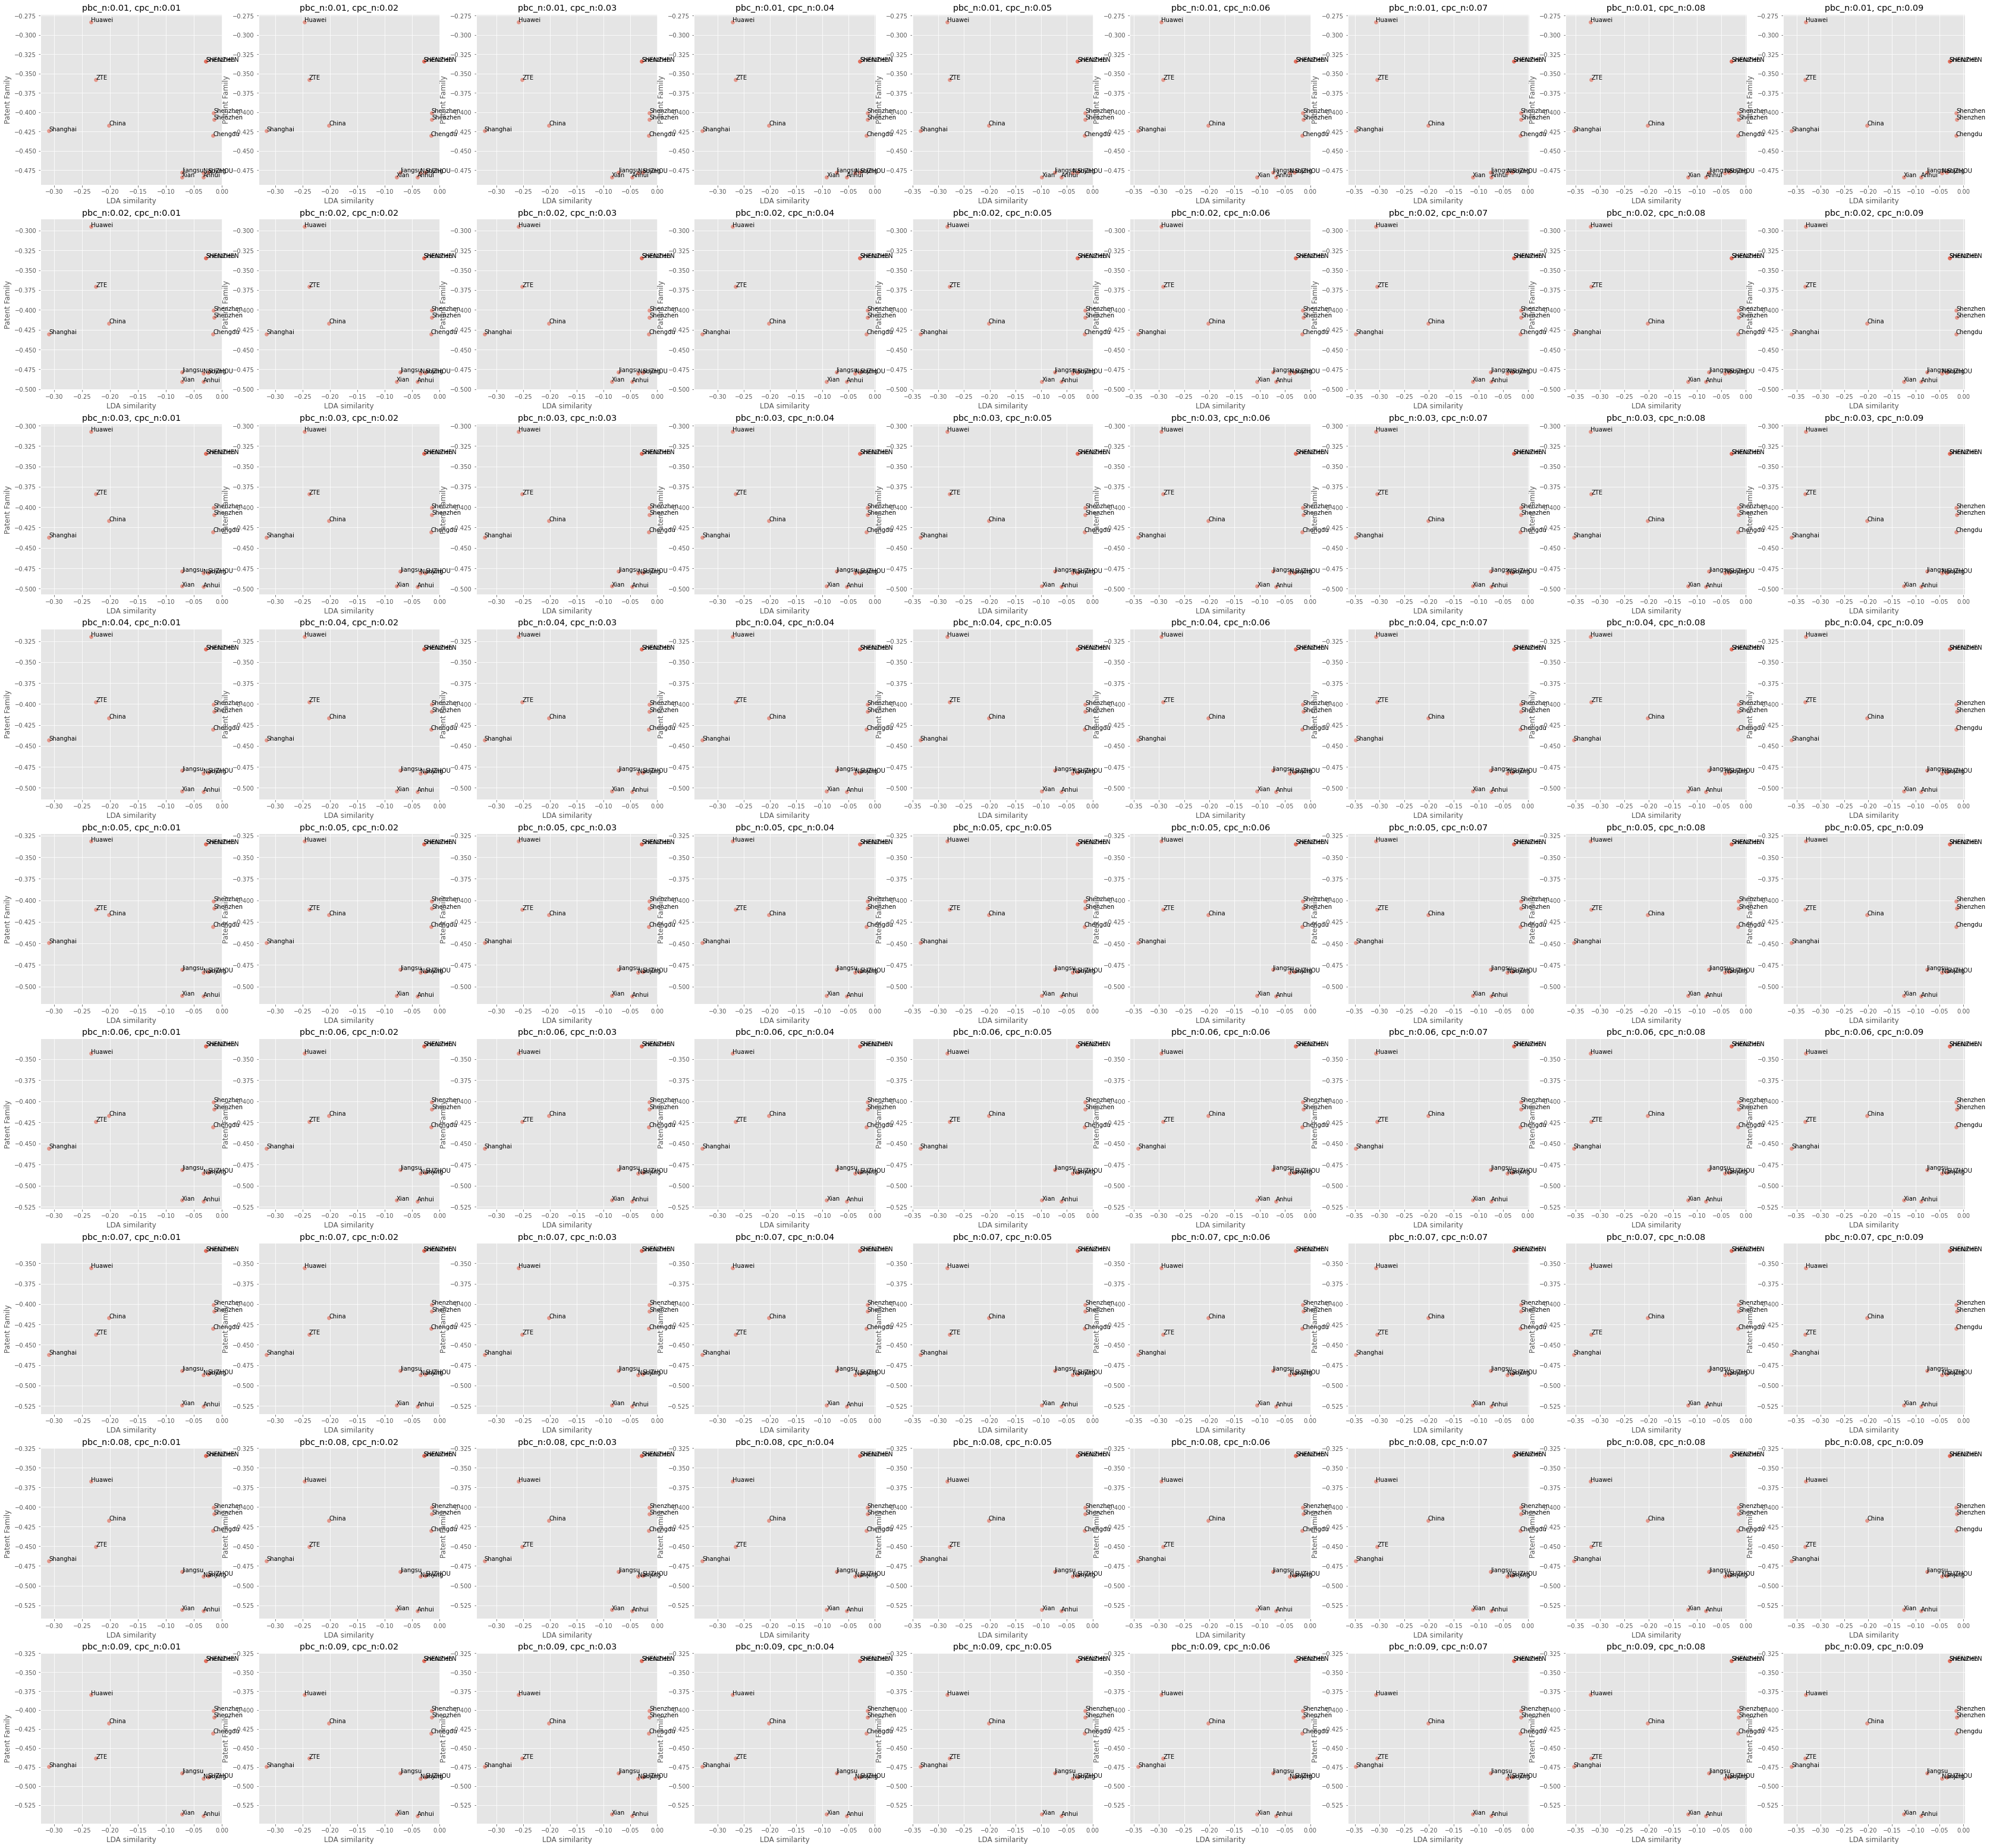

In [22]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("LDA similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_cn_brief_2016_2.png'.format(pbc_n))

In [23]:
c_df

,cpc,country
company,,
ZTE Corp,0.331574,0.463621
Huawei Technologies Co Ltd,0.331416,0.379693
Anhui Sharetronic Iot Technology Co Ltd,0.088651,0.539081
Xian Irain IoT Technology Service Co Ltd,0.125495,0.537322
Shanghai Langbo Communication Technology Co Ltd,0.360557,0.474725
Nanjing IoT Sensor Technology Co Ltd,0.044896,0.489685
SUZHOU XUANHE IOT TECHNOLOGY Co Ltd,0.035081,0.488445
Jiangsu IoT Research and Development Center,0.076480,0.482918
China Mobile Communications Group Co Ltd,0.202055,0.416921


In [24]:
c_df = scatter_plot(pbc_n,cpc_n)
c_df = c_df.reset_index()
c_df["company"] = c_df.company.apply(lambda x: x.replace(" Inc","")\
                                                    .replace(" Co Ltd","")\
                                                    .replace(" Co. Ltd.","")\
                                                    .replace(" Co., Ltd.","")\
                                                    .replace(" Ltd","")\
                                                    .replace(" Corp","")\
                                                    .replace("..","")\
                                                    .replace("International Business Machines","IBM")\
                                                    .replace("Nippon Telegraph and Telephone","Nippon Telegraph & Tel")\
                                                    .replace("Alibaba Group Holding Ltd","Alibaba")\
                                                    .replace("ZTE Intelligent IoT Technology","ZTE")\
                                                    .replace("AT&T Intellectual Property I LP","AT&T")\
                                                    .replace("Microsoft Technology Licensing LLC","Microsoft")\
                                                    .replace("Telefonaktiebolaget LM Ericsson AB","Ericsson")\
                                                    .replace("Cisco Technology","Cisco Systems")\
                                                    .replace("Verizon Patent and Licensing","Verizon Communications")\
                                                    .replace("Nokia Technologies Oy","Nokia")\
                                                    .replace("China Mobile Communications Group","China Mobile")\
                                                    .replace("Nokia Solutions and Networks Oy","Nokia")\
                                                    .replace("China Mobile","China_Mobile")\
                                                    .replace("China Mobile IoT","China_Mobile_IoT")\
                                                    .replace("China United Network Communications Group","China_Unicom")\
                                                    .replace("Shanghai Langbo Communication Technology","Shanghai_Langbo")\
                                                    .replace("State Grid of China SGCC","SGCC")\
                                                    .replace("Beijing Sankuai Online Technology","Beijing_Sankuai")\
                                                    .replace("Beijing Xiaomi Mobile Software","Xiaomi")\
                                                    .replace("Guangdong Oppo Mobile Telecommunications","Oppo")\
                                                    .replace("Shanghai Roye Electric Science and Technology","Shanghai_Roye_Electric")\
                                                    .replace("Xian Irain IoT Technology Servic","Xian_Irain")\
                                                    .replace("China University of Geosciences","CUG")\
                                                    .replace("Shenzhen Shenglu IoT Communication Technology","Shenglu")\
                                                    .replace("Chengdu Qinchuan IoT Technology","Qinchuan_IoT")\
                                                    .replace("Hangzhou Wopu IoT Technology","Wopu_IoT")\
                                                    .replace("Huaway IoT Technology","Huaway_IoT")\
                                                    .replace("HUIZHOU TECHZEN IOT SCIENCE & TECHNOLOGY","HUIZHOU_TECHZEN_IOT")\
                                                    .replace("Anhui Sharetronic Iot Technology","Anhui_Sharetronic")\
                                                    .replace("Nanjing IoT Sensor Technology","Nanjing_IoT")\
                                                    .replace("SUZHOU XUANHE IOT TECHNOLOGY","SUZHOU_XUANHE_IOT")\
                                                    .replace("Jiangsu IoT Research and Development Center","Jiangsu_IoT")\
                                                    .replace("Shenzhen JBT Smart Lighting","JBT_Smart_Lighting")\
                                                    .replace("Shenzhen Mayixiongbing Iot Technology","Mayixiongbing_IoT")\
                                                    .replace("SHENZHEN QIANHAI LINGJU INTERNET OF THINGS SCIENCE & TECHNOLOGY","QIANHAI_LINGJU")\
                                                    .replace("Shenzhen Qianhai Livall IoT Technology","Livall"))
c_df.set_index("company", inplace=True)
c_df = c_df.drop("Samsung Electronics")

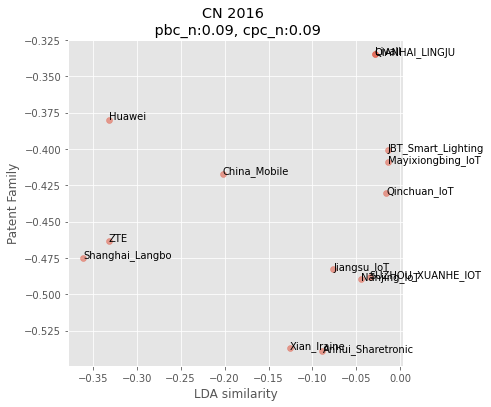

In [25]:
pbc_n=0.09
cpc_n=0.09
# c_df = scatter_plot(pbc_n,cpc_n)
# c_df = c_df.drop("Samsung Electronics Co Ltd")

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("CN 2016 \n pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("LDA similarity")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [26]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [27]:
competitor_ls

[4, 2, 3, 3, 4, 3, 3, 3, 2, 1, 1, 1, 1, 1]

In [28]:
c_df

,cpc,country
company,,
ZTE,0.331574,0.463621
Huawei Technologies,0.331416,0.379693
Anhui_Sharetronic,0.088651,0.539081
Xian_Iraine,0.125495,0.537322
Shanghai_Langbo,0.360557,0.474725
Nanjing_IoT,0.044896,0.489685
SUZHOU_XUANHE_IOT,0.035081,0.488445
Jiangsu_IoT,0.076480,0.482918
China_Mobile,0.202055,0.416921


In [29]:
c_df.to_csv("competitor_df/company/lda_cn_2016.csv")